<a href="https://colab.research.google.com/github/Alejm16/NLPproject/blob/main/RL_Project_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install --upgrade pandas==1.3.1

     |████████████████████████████████| 11.5 MB 4.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [8]:
import os
import sys
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_pickle("/content/enron_dataframe.pkl")
print(df.head())
print(df.shape)

                                                Text    Person
0                                                     arnold-j
1                            let's push until monday  arnold-j
2                                        what's pdx?  arnold-j
3  BMO wants to do this sleave trade. Duke, Dyneg...  arnold-j
4  I'm big seller of interventions. they tend not...  arnold-j
(95573, 2)


train/test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Person'], train_size=0.8, random_state = 237)

Preprocessing Input


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

np.set_printoptions(threshold=sys.maxsize)
# 'binary' parameter when not set indicates the encoding measure is term frequency
vectorizer = CountVectorizer()
data_train = vectorizer.fit_transform(X_train)
print(vectorizer.get_feature_names_out())
data_test = vectorizer.fit_transform(X_test)
print(vectorizer.get_feature_names_out())

In [13]:
## converting to numeric labels
from sklearn import preprocessing
tgt_enc = preprocessing.LabelEncoder()
persons = np.unique(df['Person'])
# fit your targets of the training data to the LabelEncoder instance
tgt_enc.fit(persons)

# get the set of unique classes
print(f"Unique categories: {list(tgt_enc.classes_)}")

Unique categories: ['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e', 'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d', 'gang-l', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d', 'giron-d', 'griffith-j', 'grigsby-m', 'haedicke-m', 'hayslett-r', 'heard-m', 'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'kuykendall-t', 'lavorato-j', 'lay-k', 'lenhart-m', 'lewis-a', 'lokay-m', 'lokey-t', 'love-p', 'lucci-p', 'maggi-m', 'mann-k', 'martin-t', 'may-l', 'mccarty-d', 'mcconnell-m', 'mckay-b', 'mckay-j', 'mclaughlin-e', 'meyers-a', 'mims-thurston-p', 'motley-m', 'neal-s', 'nem

In [14]:
labels_persons = tgt_enc.transform(persons)
print(f"Unique categories: {labels_persons}")

Unique categories: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]


In [15]:
output_train_data = tgt_enc.transform(y_train)
output_test_data = tgt_enc.transform(y_test)
input_train_data = vectorizer.fit_transform(X_train)
input_test_data = vectorizer.transform(X_test)

In [16]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(input_train_data, output_train_data)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(input_train_data, output_train_data)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(input_train_data, output_train_data)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(input_train_data, output_train_data)

Linear Kernel SVM

In [ ]:
linear_pred = linear.predict(input_test_data)
accuracy_lin = lin.score(input_test_data, output_test_data)
print("Accuracy Sigmoid Kernel:", accuracy_lin)

Poly SVM

In [17]:
poly_pred = poly.predict(input_test_data)
accuracy_poly = poly.score(input_test_data, output_test_data)
print("Accuracy Polynomial Kernel:", accuracy_poly)

Accuracy Polynomial Kernel: 0.0656552445723254


In [18]:
import pickle
pkl_filename = "/content/poly_svm.pkl"
with open(pkl_filename,'wb') as file:
  pickle.dump(poly,file)

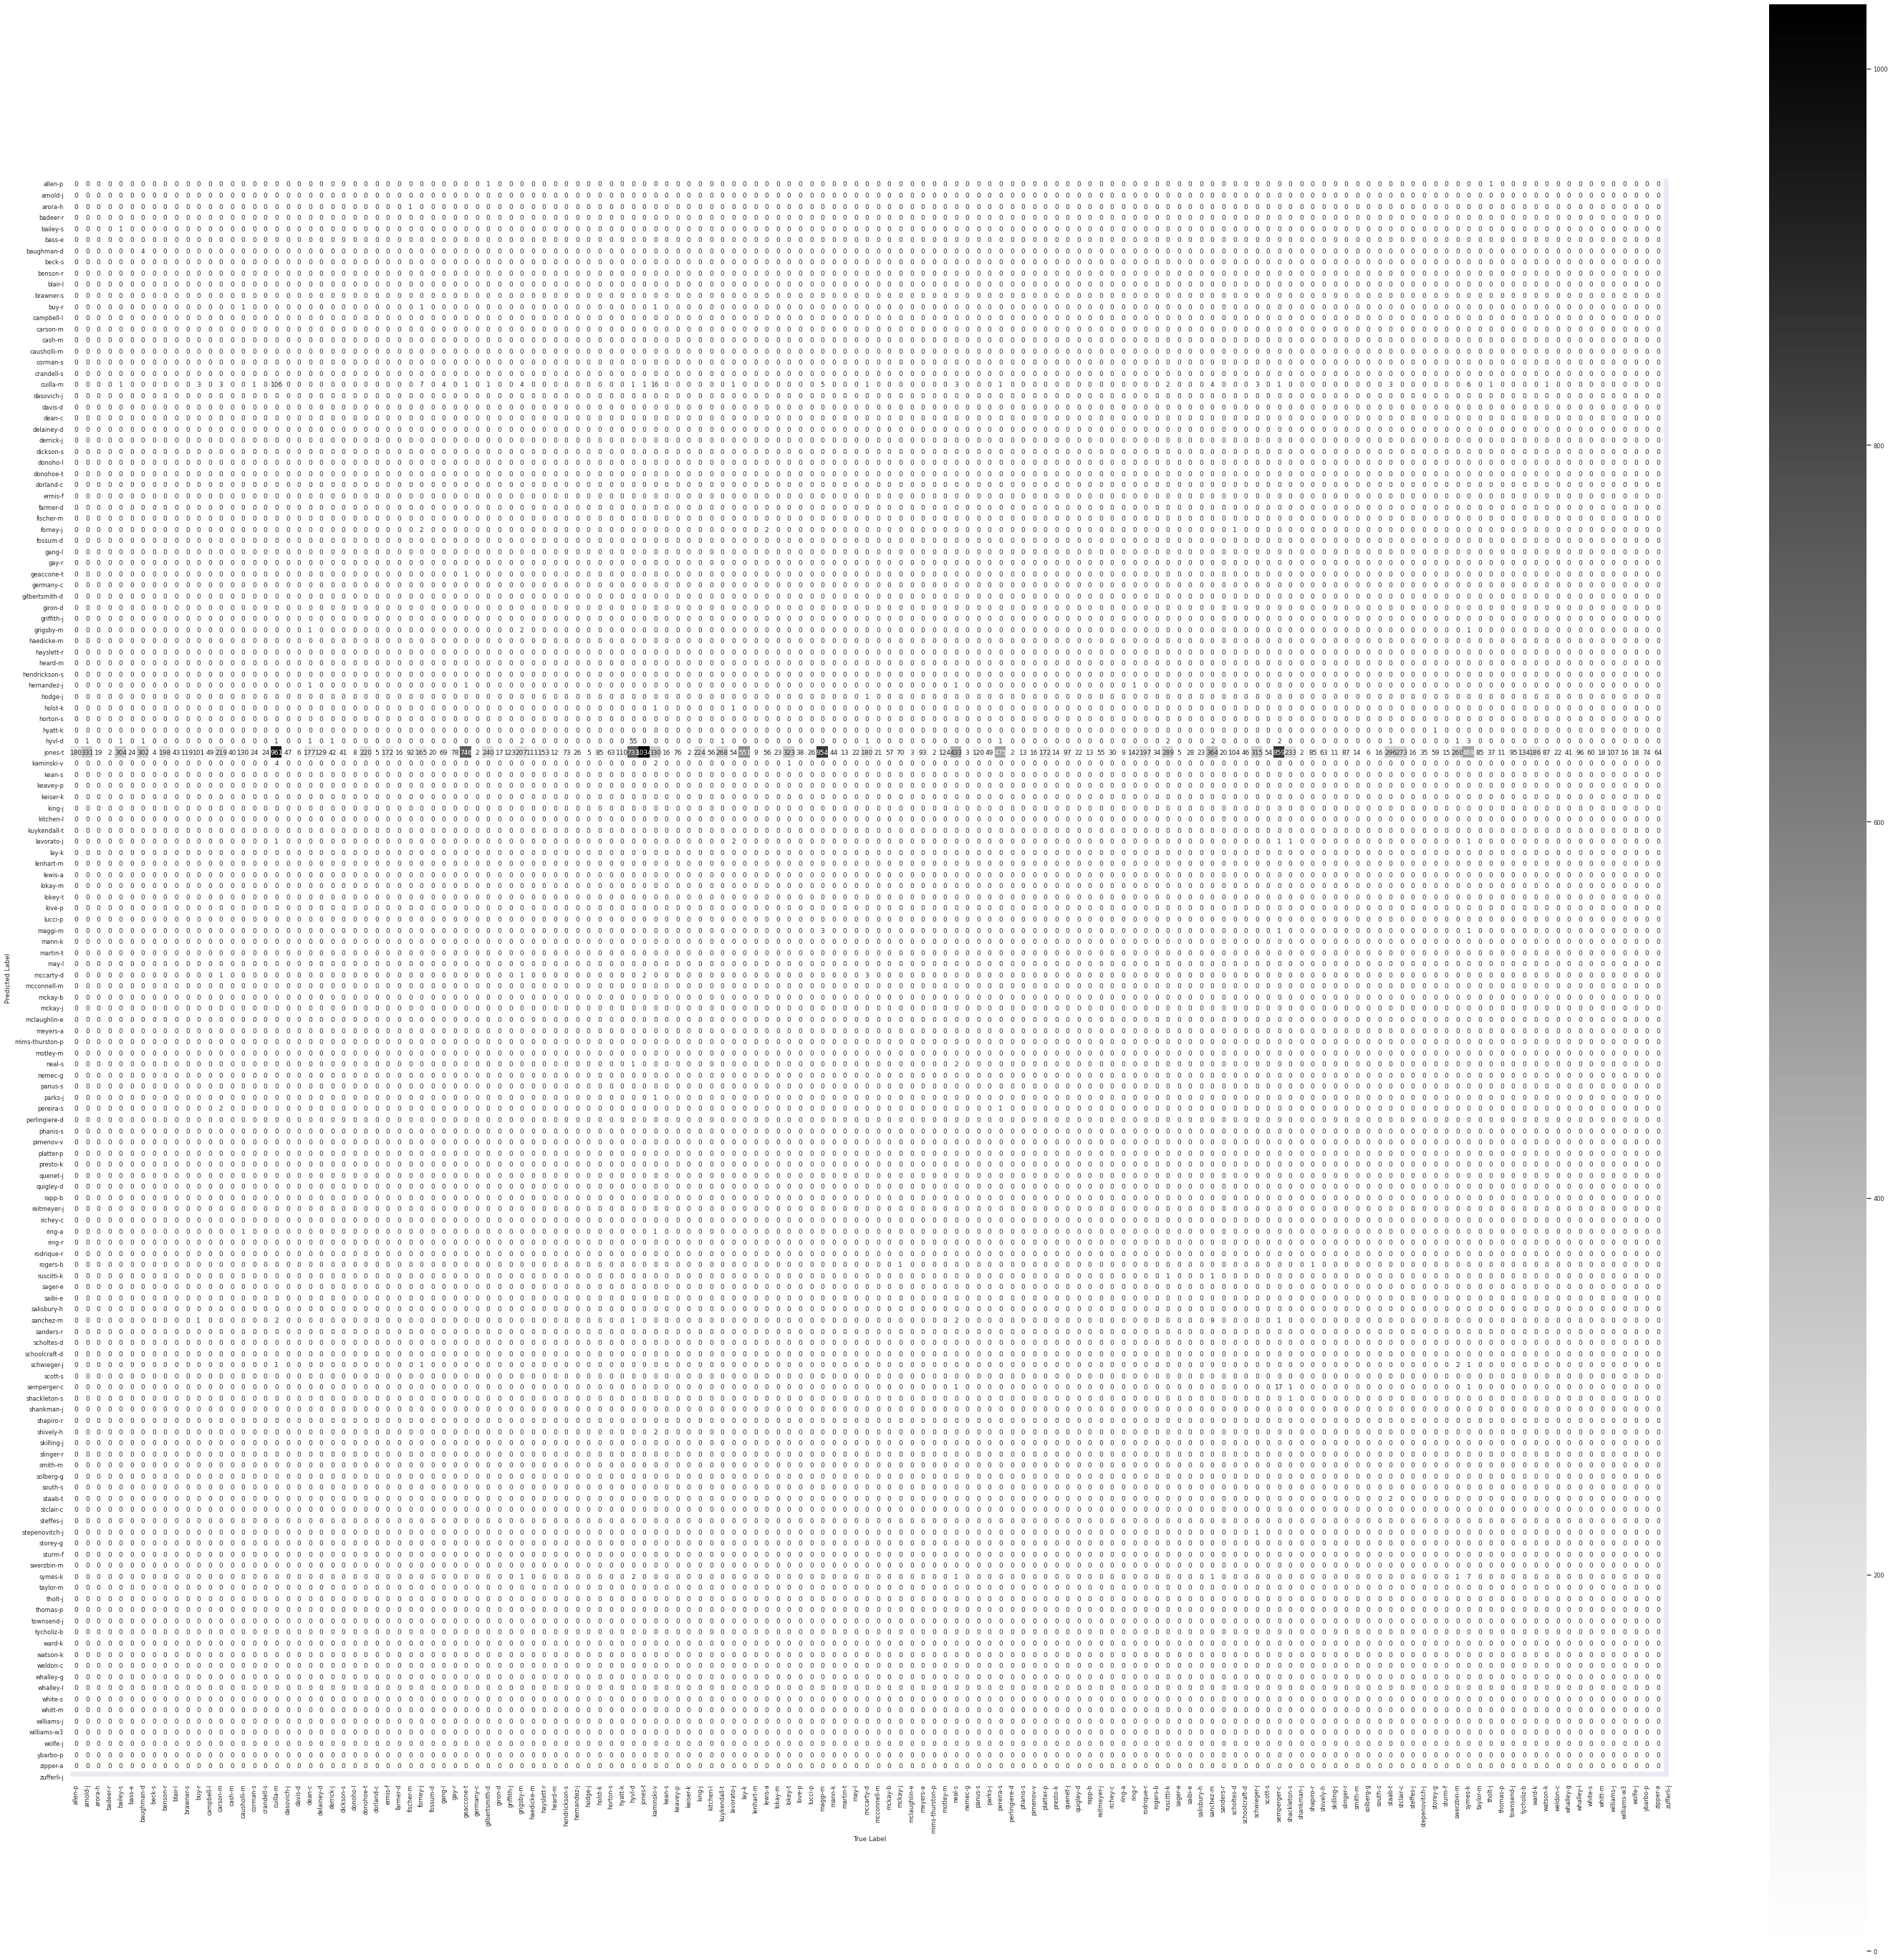

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(output_test_data,poly_pred)
sns.set(rc = {'figure.figsize':(50,50)},font_scale = .75)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Greys',xticklabels=tgt_enc.classes_,yticklabels=tgt_enc.classes_)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
#plt.rcParams['figure.figsize'] = [10, 8]
plt.show()